# Caracterização meteorológica da área de estudo

Aluna: Bruna Boscato Toscani

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia de superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade

## Meteorologia de superfície
Analisaremos os dados de metar (estação meteorológica em aeroportos). 
<br>Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR .
<br>Faça seu login e colete o dado para o período de 01/01/2023 a 01/01/2024.
<br>Os dados estarão na pasta de inputs/meteoSuperficie com a nomenclatura metar.csv

In [1]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241
C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241\inputs\meteoSuperficie
['metar.csv.csv']


In [2]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [3]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


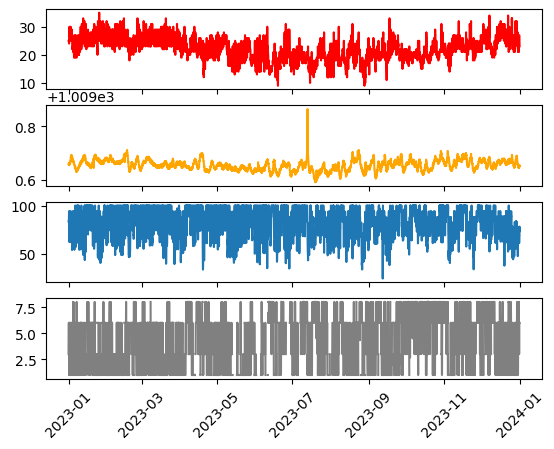

In [4]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'],color='red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'],color='orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

O percentil 99 da temperatura é:31.0
O percentil 99 da pressão é:1009.6967607391396
O percentil 99 da umidade relativa é:100.0
O percentil 99 da cobertura de nuvens é:nan


{'whiskers': [<matplotlib.lines.Line2D at 0x26b5730a390>,
 'caps': [<matplotlib.lines.Line2D at 0x26b5730bb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x26b56e5d990>],
 'medians': [<matplotlib.lines.Line2D at 0x26b5730d110>],
 'fliers': [<matplotlib.lines.Line2D at 0x26b5730dad0>],
 'means': []}

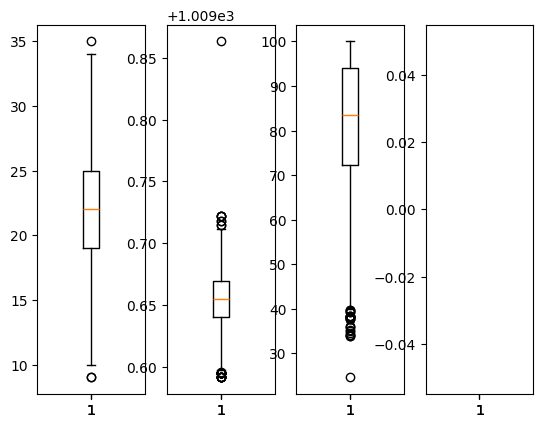

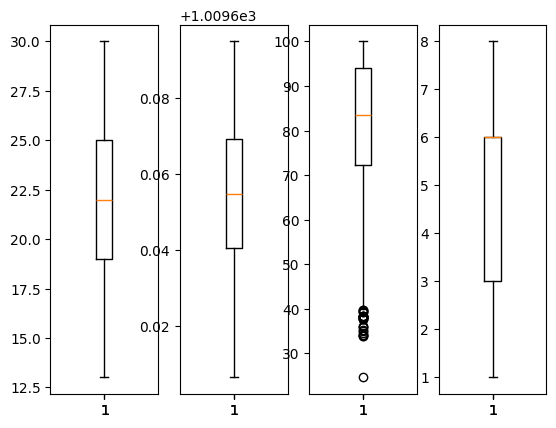

In [20]:
# Fazendo boxplot das variáveis
fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])

# Removendo valores acima do percentil 95°
import numpy as np
temp99 = np.percentile(metSuperficie['temp'],99)
print('O percentil 99 da temperatura é:' + str(temp99))
p99 = np.percentile(metSuperficie['p'],99)
print('O percentil 99 da pressão é:' + str(p99))
relh99 = np.percentile(metSuperficie['relh'],99)
print('O percentil 99 da umidade relativa é:' + str(relh99))
cco99 = np.percentile(metSuperficie['cco'],99)
print('O percentil 99 da cobertura de nuvens é:' + str(cco99))

fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp']<temp99) & 
              (metSuperficie['temp']>np.percentile(metSuperficie['temp'],0.5))])
ax[1].boxplot(metSuperficie['p'][(metSuperficie['p']<p99) & 
              (metSuperficie['p']>np.percentile(metSuperficie['p'],0.5))])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])

                  day  month    year       hour  ct          wd        ws  \
datetime                                                                    
2023-01-31  16.000000    1.0  2023.0  11.500000 NaN  203.930861  3.819839   
2023-02-28  14.493294    2.0  2023.0  11.500745 NaN  211.994368  3.374681   
2023-03-31  16.000000    3.0  2023.0  11.500000 NaN  212.134089  3.262525   
2023-04-30  15.500000    4.0  2023.0  11.500000 NaN  229.672012  3.304112   
2023-05-31  16.000000    5.0  2023.0  11.500000 NaN  248.224432  3.329711   
2023-06-30  15.500000    6.0  2023.0  11.500000 NaN  254.177680  3.727099   
2023-07-31  16.000000    7.0  2023.0  11.500000 NaN  244.600753  3.672328   
2023-08-31  16.000000    8.0  2023.0  11.500000 NaN  233.475650  4.191693   
2023-09-30  15.500000    9.0  2023.0  11.500000 NaN  230.095923  4.188015   
2023-10-31  16.000000   10.0  2023.0  11.500000 NaN  214.431250  3.726607   
2023-11-30  15.484006   11.0  2023.0  11.510431 NaN  205.173410  4.022299   

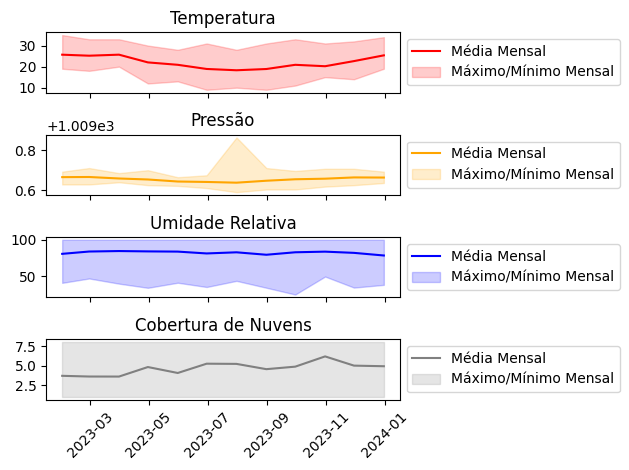

In [22]:
# Estatísticas dos dados mensais
media_mensal = metSuperficie.resample('ME').mean()
min_mensal = metSuperficie.resample('ME').min()
max_mensal = metSuperficie.resample('ME').max()

print(media_mensal)

# Plotando médias mensais com sombras
fig, ax = plt.subplots(4, sharex=True)

# Temperatura
ax[0].plot(media_mensal.index, media_mensal['temp'], color='red', label='Média Mensal')
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='red', alpha=0.2, label='Máximo/Mínimo Mensal')
ax[0].set_title('Temperatura')
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Pressão
ax[1].plot(media_mensal.index, media_mensal['p'], color='orange', label='Média Mensal')
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='orange', alpha=0.2, label='Máximo/Mínimo Mensal')
ax[1].set_title('Pressão')
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Umidade Relativa
ax[2].plot(media_mensal.index, media_mensal['relh'], color='blue', label='Média Mensal')
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], color='blue', alpha=0.2, label='Máximo/Mínimo Mensal')
ax[2].set_title('Umidade Relativa')
ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Cobertura de Nuvens
ax[3].plot(media_mensal.index, media_mensal['cco'], color='gray', label='Média Mensal')
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='gray', alpha=0.2, label='Máximo/Mínimo Mensal')
ax[3].set_title('Cobertura de Nuvens')
ax[3].tick_params(axis='x', rotation=45)
ax[3].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

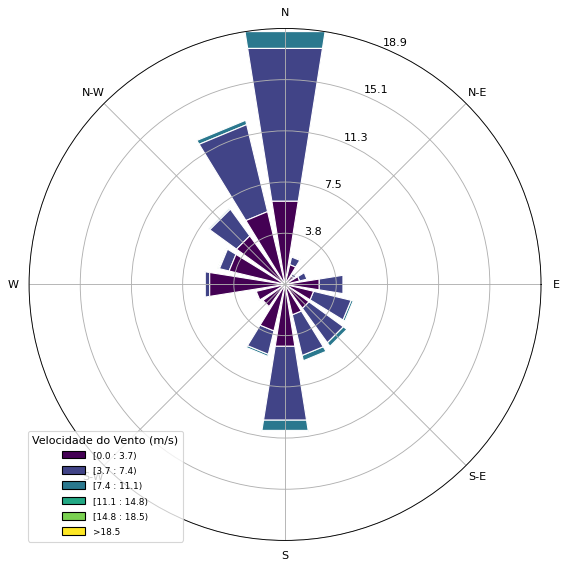

In [16]:
# Criando rosa dos ventos
ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend(title="Velocidade do Vento (m/s)")
plt.show()

As condições meteorológicas de Florianópolis em 2023, analisadas a partir de dados de temperatura, pressão, umidade relativa, cobertura de nuvens e vento, mostraram influências diretas na qualidade do ar. Altas temperaturas no verão favoreceram a formação de ozônio troposférico, enquanto períodos de alta pressão atmosférica provocaram inversões térmicas, resultando no acúmulo de poluentes. A umidade elevada contribuiu para a formação de partículas secundárias, impactando a saúde respiratória. A direção e velocidade do vento afetaram a dispersão de poluentes, com ventos fortes melhorando a qualidade do ar e ventos fracos levando ao acúmulo de poluentes. A cobertura de nuvens reduziu a formação de ozônio, mas indicou condições instáveis que facilitaram a dispersão dos poluentes. 

Sendo assim, a gestão da qualidade do ar em Florianópolis deve considerar essas variáveis meteorológicas para implementar medidas eficazes de controle da poluição.

# Análise upperair/sondagem/perfil da atmosfera
Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

Dados para 2023-06-21 00:00:00:
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1021.0      5.0         16.8      14.1        320      5   3.213938   
1     1000.0    180.0         16.8      12.2        330     13   6.500000   
2      972.0    422.0         16.2       9.2        332     12   5.633659   
3      943.0    679.0         13.8       9.1        334     10   4.383711   
4      925.0    842.0         13.6       6.6        335      9   3.803564   
..       ...      ...          ...       ...        ...    ...        ...   
79      42.0  21720.0        -56.9     -91.6        265     32  31.878230   
80      37.0  22521.0        -53.5     -90.3        285     30  28.977775   
81      36.8  22556.0        -53.3     -90.3        285     30  28.977775   
82      33.1  23234.0        -55.3     -91.3        275     30  29.885841   
83      33.0      NaN          NaN       NaN        275     30  29.885841   

       v_wind station  station_number      

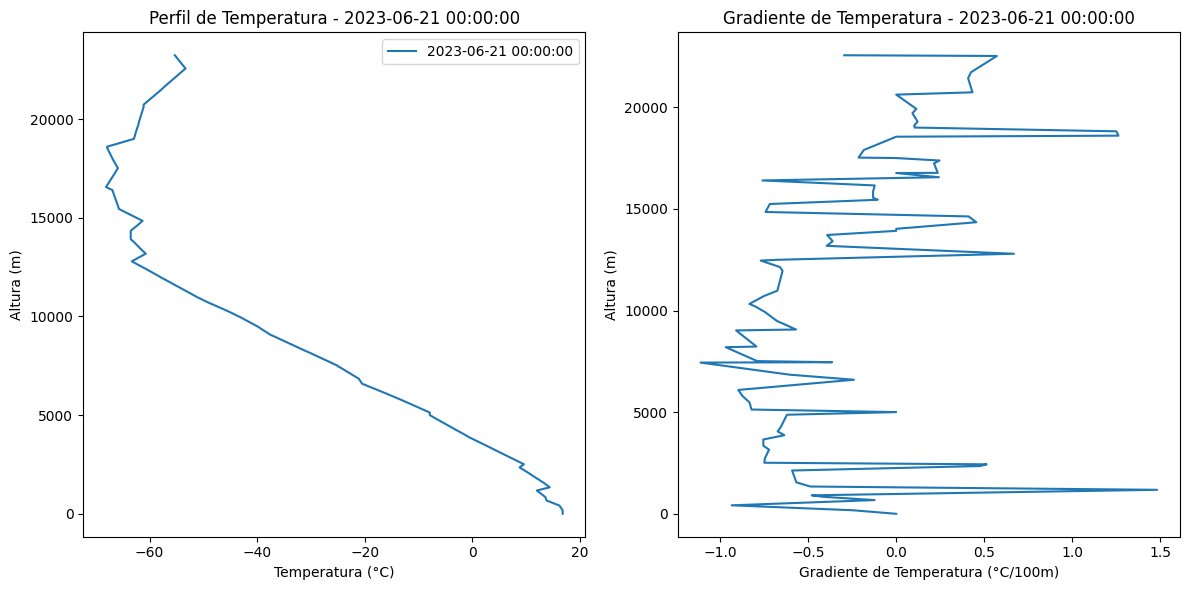

Dados para 2023-06-21 12:00:00:
     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1020.0      5.0         16.6      13.7        330      8   4.000000   
1      1000.0    174.0         16.6      12.2        310     14  10.724622   
2       993.0    234.0         16.4      12.3        312     15  11.147172   
3       925.0    835.0         13.2      12.6        335     25  10.565457   
4       916.4    914.0         12.7      12.0        335     25  10.565457   
..        ...      ...          ...       ...        ...    ...        ...   
100      23.0  25541.0        -52.1     -87.0        285     30  28.977775   
101      20.0  26440.0        -53.7     -87.7        275     28  27.893452   
102      18.0  27116.0        -54.3     -88.3        270     35  35.000000   
103      17.3  27370.0        -54.5     -88.5        284     32  31.049463   
104      17.0      NaN          NaN       NaN        290     31  29.130471   

           v_wind station  stat

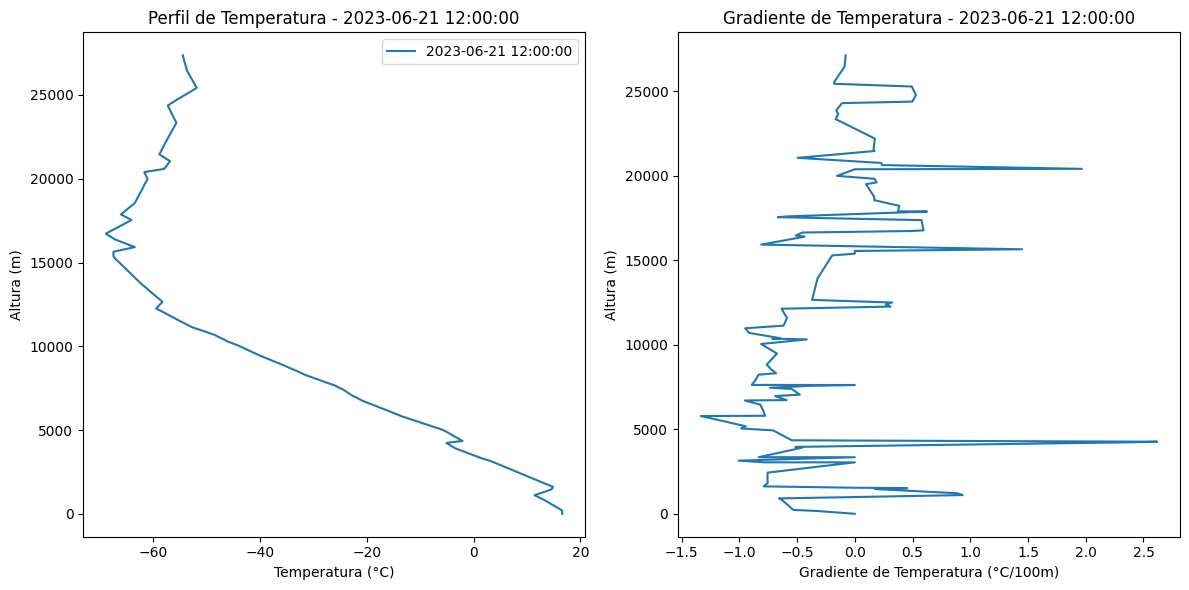

Dados para 2023-06-22 00:00:00:
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1017.0      5.0         19.2      17.2        350      2   0.347296   
1     1000.0    150.0         18.8      16.0        355     13   1.133025   
2      925.0    816.0         14.0      14.0        355     20   1.743115   
3      914.3    914.0         13.4      13.2        355     19   1.655959   
4      900.0   1047.0         12.6      12.0        338     16   5.993705   
..       ...      ...          ...       ...        ...    ...        ...   
81      36.0  22713.0        -55.1     -88.0        295     24  21.751387   
82      35.0  22891.0        -54.9     -87.9        291     26  24.273091   
83      30.0  23870.0        -55.1     -88.1        270     40  40.000000   
84      27.3  24471.0        -55.9     -87.9        261     42  41.482910   
85      27.0      NaN          NaN       NaN        260     42  41.361926   

          v_wind station  station_number   

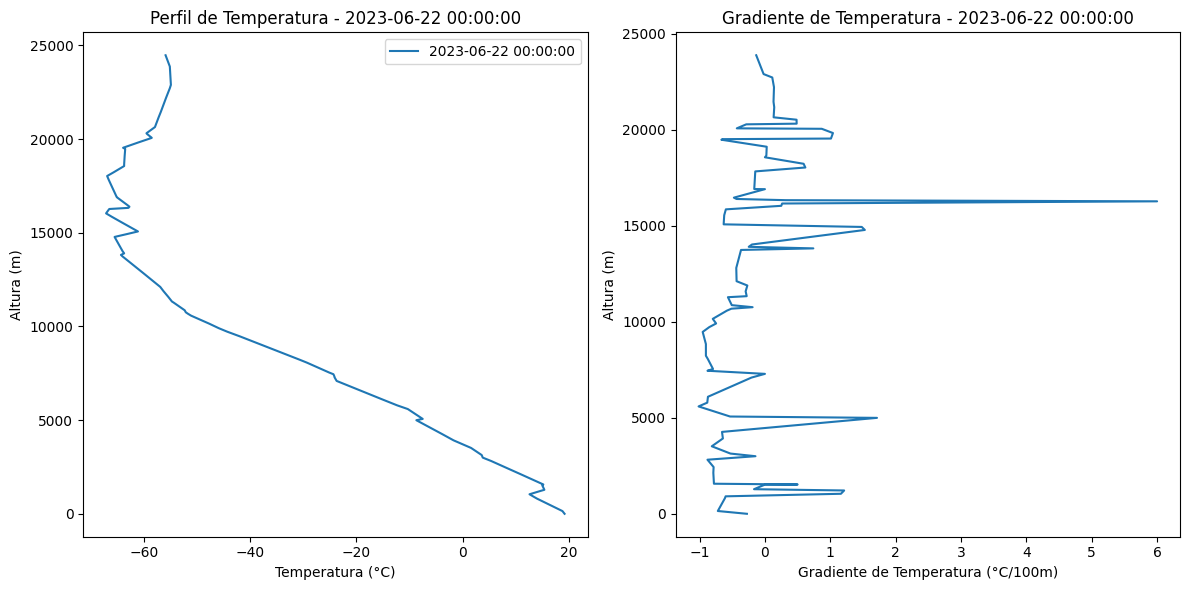

Dados para 2023-06-22 12:00:00:
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1016.0       5         18.8      17.3      330.0    6.0   3.000000   
1     1000.0     145         18.8      15.5      330.0   15.0   7.500000   
2      925.0     813         16.2      12.2      315.0   19.0  13.435029   
3      914.1     914         16.1      11.3      315.0   22.0  15.556349   
4      884.0    1199         15.8       8.8      315.0   29.0  20.506097   
..       ...     ...          ...       ...        ...    ...        ...   
94      22.6   25677        -48.5     -86.5      311.0   11.0   8.301805   
95      22.0   25854        -48.6     -86.6      340.0   10.0   3.420201   
96      21.0   26159        -48.7     -86.7      345.0   11.0   2.847009   
97      20.0   26480        -48.9     -86.9      315.0   13.0   9.192388   
98      19.5   26646        -49.5     -87.5        NaN    NaN        NaN   

       v_wind station  station_number                ti

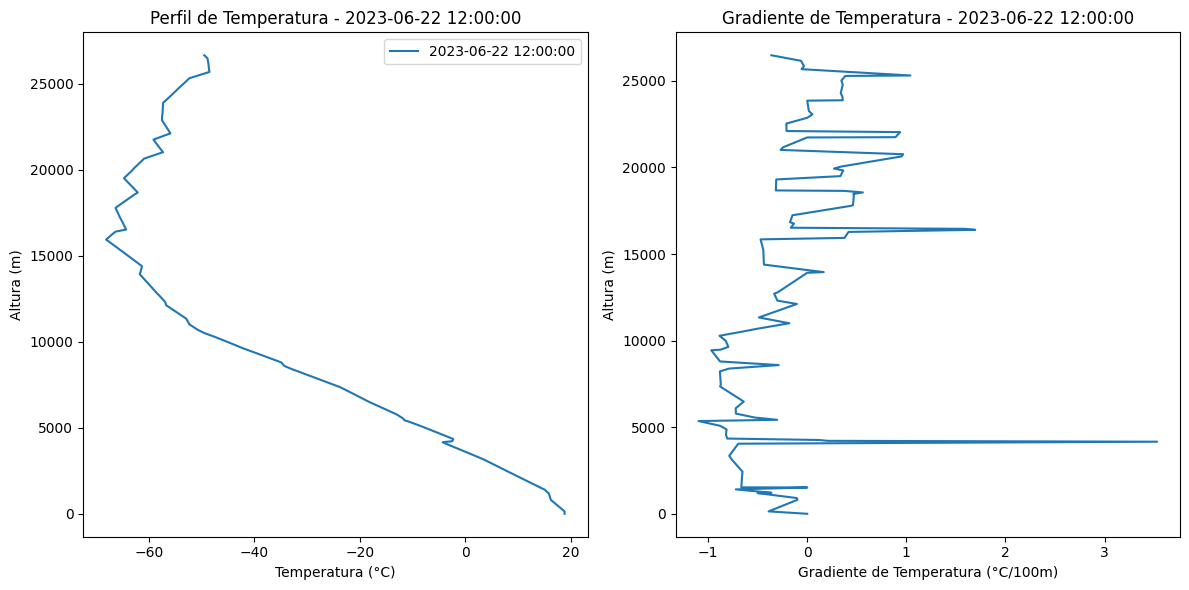

Dados para 2023-06-23 00:00:00:
    pressure   height  temperature  dewpoint  direction  speed      u_wind  \
0     1015.0      5.0         20.4      18.4        120      7   -6.062178   
1     1000.0    138.0         20.8      16.9        100      7   -6.893654   
2      998.0    155.0         20.8      16.8         96      7   -6.961653   
3      925.0    812.0         19.0      14.0        320     11    7.070664   
4      921.0    849.0         19.1      13.8        320     11    7.070664   
5      910.0    953.0         19.2      13.2        315     12    8.485281   
6      881.0   1230.0         17.4      12.4        300     16   13.856406   
7      850.0   1536.0         15.4      11.5        325     16    9.177223   
8      847.0   1565.0         15.2      11.4        325     17    9.750799   
9      802.0   2020.0         11.9       9.3        290     18   16.914467   
10     728.0   2827.0          6.2       5.7        275     24   23.908673   
11     711.0   3024.0          4

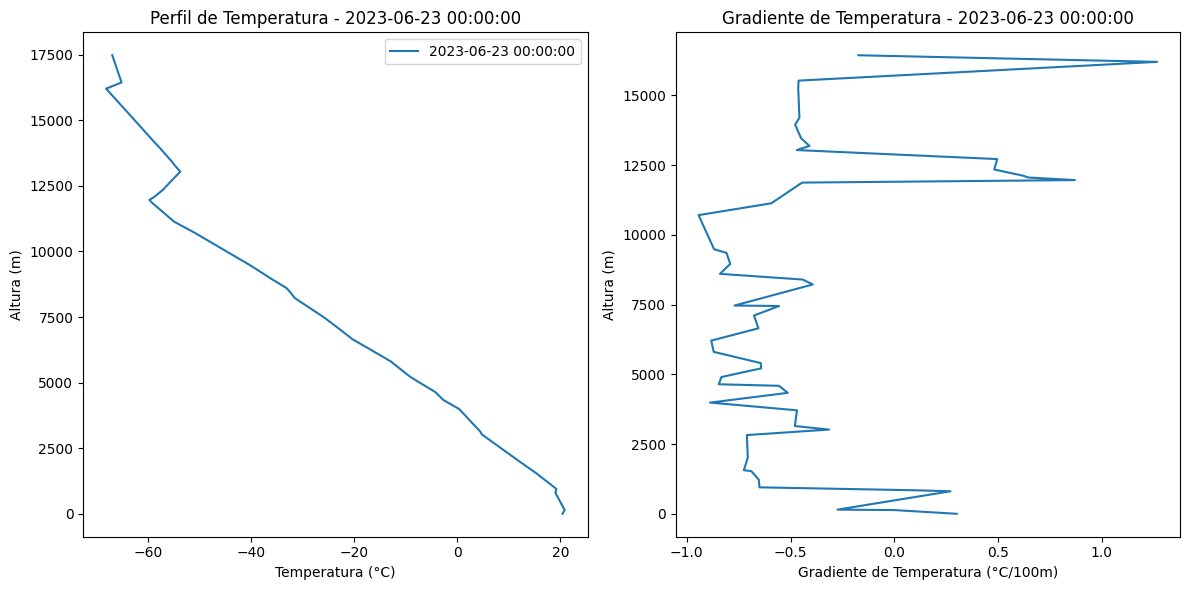

Dados para 2023-06-23 12:00:00:
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1015.0      5.0         17.4      17.1        290      1   0.939693   
1     1000.0    132.0         17.2      16.7        315      5   3.535534   
2      979.0    314.0         17.6      15.9        335     10   4.226183   
3      967.0    420.0         17.8      15.4        316     10   6.946584   
4      935.0    707.0         16.3      13.8        265     10   9.961947   
5      929.0    762.0         16.0      13.5        262     12  11.883217   
6      925.0    799.0         16.2      12.9        260     13  12.802501   
7      924.0    808.0         16.2      12.8        260     16  15.756924   
8      898.0   1052.0         17.4      10.4        285     13  12.557036   
9      867.0   1351.0         15.7       9.4        315     10   7.071068   
10     850.0   1520.0         14.8       8.8        320     13   8.356239   
11     814.0   1885.0         12.9       6.9

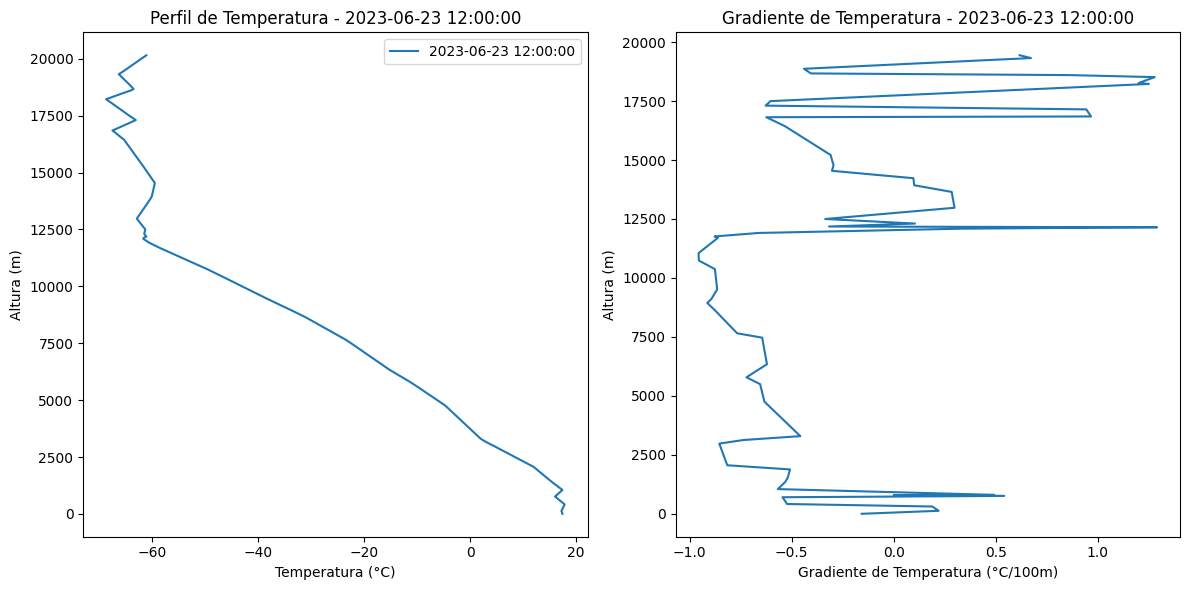

Dados para 2023-06-24 00:00:00:
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1013.0       5         21.6      14.6      350.0   10.0   1.736482   
1     1007.0      57         22.0      13.4      330.0   15.0   7.500000   
2     1002.0     101         22.4      12.4      323.0   19.0  11.434485   
3     1000.0     119         22.2      12.2      320.0   21.0  13.498540   
4      975.0     339         21.3      11.3      285.0   22.0  21.250368   
..       ...     ...          ...       ...        ...    ...        ...   
72      74.0   18251        -64.7     -88.7      290.0   23.0  21.612930   
73      72.0   18418        -64.4     -88.4      265.0   18.0  17.931505   
74      70.0   18590        -64.1     -88.1      275.0   15.0  14.942920   
75      63.0   19238        -62.4     -88.3      305.0   22.0  18.021345   
76      62.8   19257        -62.3     -88.3        NaN    NaN        NaN   

       v_wind station  station_number       time  latit

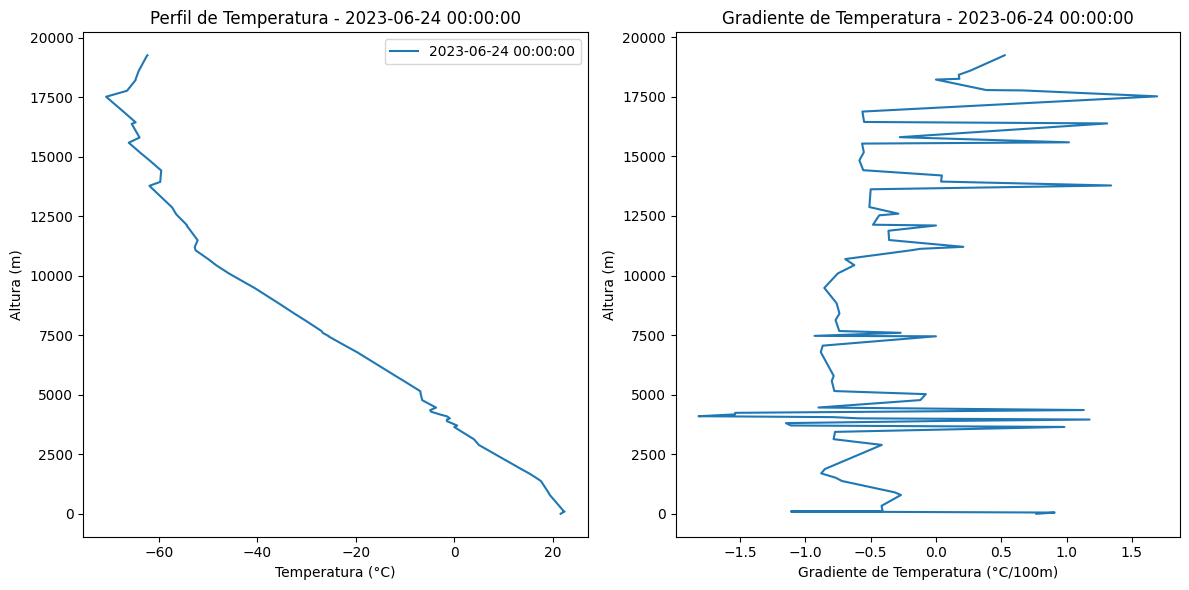

Dados para 2023-06-24 12:00:00:
     pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0      1014.0       5         18.2      16.5      270.0    4.0   4.000000   
1      1003.0     101         18.6      14.2      317.0    6.0   4.091990   
2      1000.0     127         19.6      13.6      330.0    7.0   3.500000   
3       997.0     153         20.8      12.8      344.0    7.0   1.929461   
4       963.0     454         22.0      11.0      140.0    1.0  -0.642788   
..        ...     ...          ...       ...        ...    ...        ...   
105      22.0   25923        -49.3     -82.3       95.0   11.0 -10.958142   
106      21.0   26229        -49.3     -82.3       85.0   14.0 -13.946726   
107      20.0   26550        -49.3     -82.3       90.0   16.0 -16.000000   
108      19.0   26887        -48.8     -82.6       70.0   20.0 -18.793852   
109      18.7   26991        -48.7     -82.7        NaN    NaN        NaN   

           v_wind station  station_number  

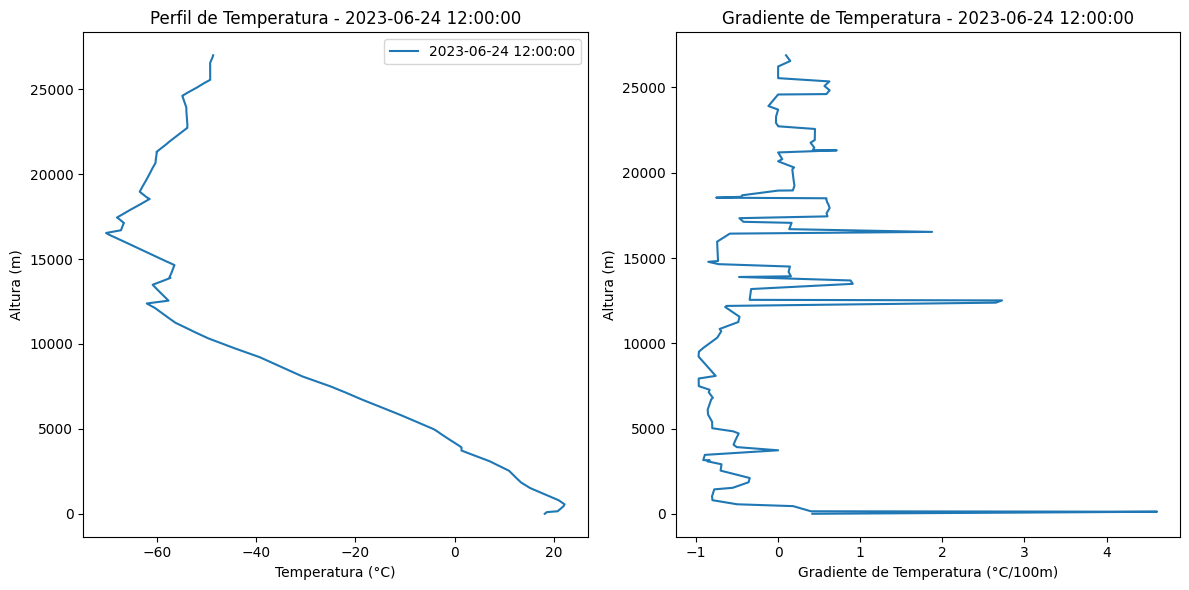

Dados para 2023-06-25 00:00:00:
     pressure  height  temperature  dewpoint  direction  speed        u_wind  \
0      1014.0       5         21.0      18.8      310.0    4.0  3.064178e+00   
1      1000.0     130         23.6      17.6      335.0   11.0  4.648801e+00   
2       994.0     183         24.4      16.4      332.0   12.0  5.633659e+00   
3       946.6     610         23.7      14.0      305.0   16.0  1.310643e+01   
4       938.0     690         23.6      13.6      303.0   16.0  1.341873e+01   
..        ...     ...          ...       ...        ...    ...           ...   
97       36.0   22774        -57.3     -85.5      280.0   10.0  9.848078e+00   
98       34.0   23136        -56.4     -85.2      280.0   14.0  1.378731e+01   
99       30.0   23930        -54.5     -84.5      215.0   10.0  5.735764e+00   
100      29.0   24147        -54.2     -84.2      180.0    3.0 -3.673940e-16   
101      28.6   24236        -54.1     -84.1        NaN    NaN           NaN   

       

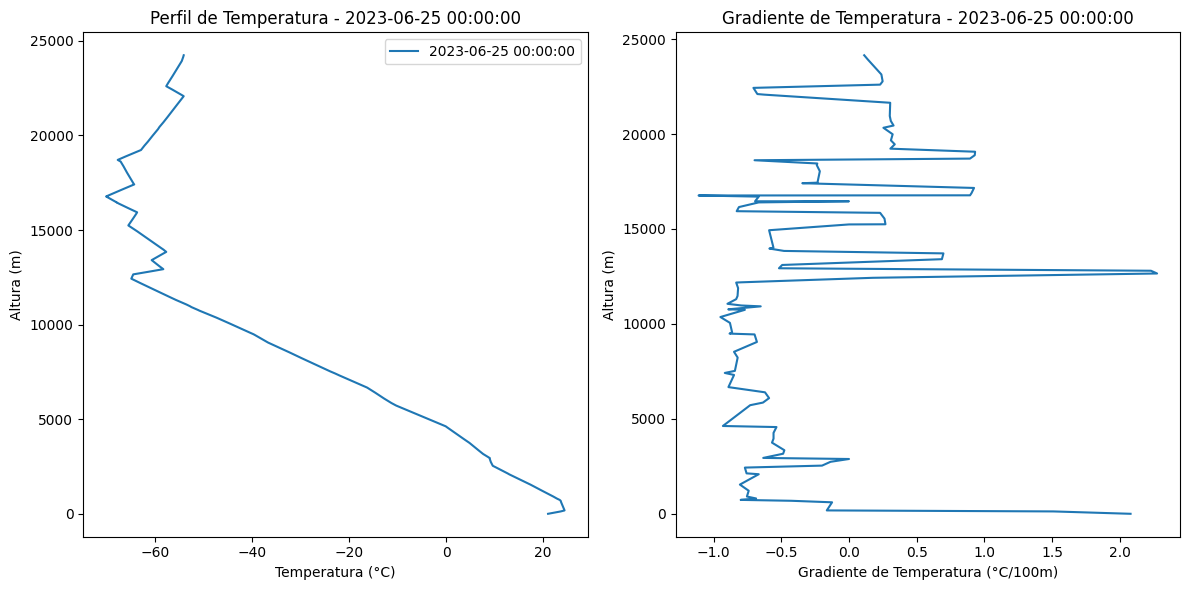

Dados para 2023-06-25 12:00:00:
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1016.0      5.0         22.8      17.9          0      7  -0.000000   
1     1004.0    112.0         25.4      14.4        323     14   8.425410   
2     1000.0    148.0         25.8      13.8        310     16  12.256711   
3      986.0    272.0         26.4      13.4        305     18  14.744737   
4      960.0    507.0         24.6      11.6        294     21  19.184455   
..       ...      ...          ...       ...        ...    ...        ...   
93      23.0  25643.0        -52.5     -83.5         70     20 -18.793852   
94      21.0  26234.0        -51.2     -82.8         80     28 -27.574617   
95      20.0  26550.0        -50.5     -82.5         70     19 -17.854160   
96      19.3  26783.0        -49.9     -82.9         67     20 -18.410097   
97      19.0      NaN          NaN       NaN         65     21 -19.032464   

       v_wind station  station_number      

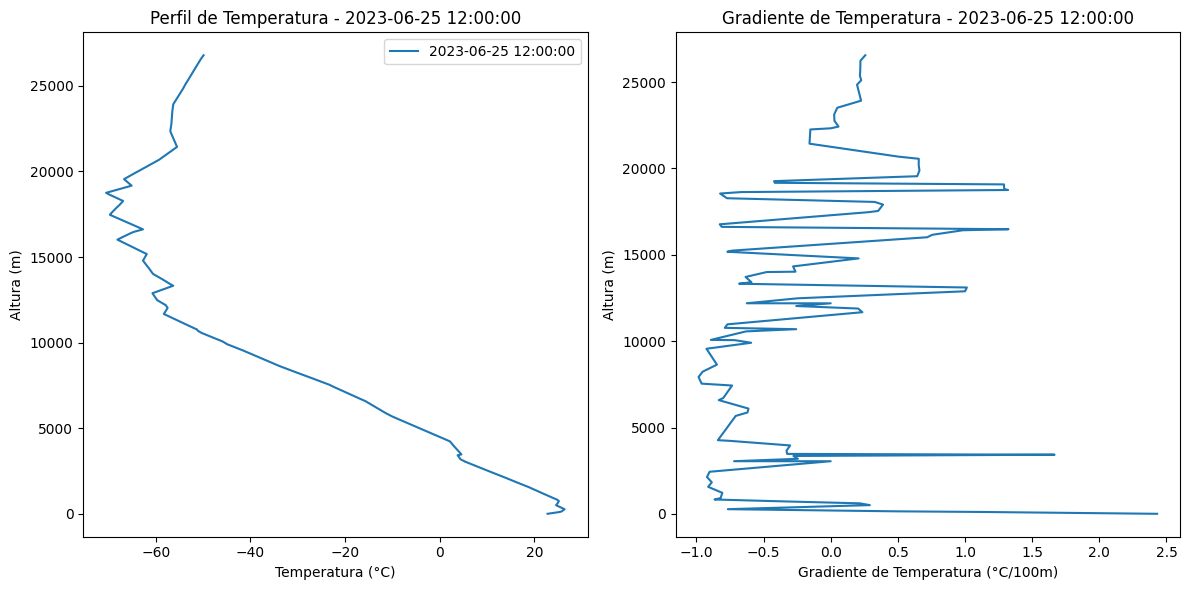

Dados para 2023-12-21 00:00:00:
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1014.0       5         24.0      20.6      110.0    3.0  -2.819078   
1     1000.0     131         23.8      20.4       90.0   13.0 -13.000000   
2      985.0     263         22.7      20.1       85.0   14.0 -13.946726   
3      948.0     597         20.0      19.3       85.0   12.0 -11.954336   
4      925.0     809         18.8      16.3       85.0   11.0 -10.958142   
..       ...     ...          ...       ...        ...    ...        ...   
94      26.0   24833        -54.8     -89.0      100.0   11.0 -10.832885   
95      25.0   25084        -54.4     -89.0      135.0   10.0  -7.071068   
96      23.8   25398        -53.9     -88.9      126.0   15.0 -12.135255   
97      23.0   25617        -53.9     -88.0      120.0   19.0 -16.454483   
98      22.9   25645        -53.9     -87.9        NaN    NaN        NaN   

          v_wind station  station_number       time  la

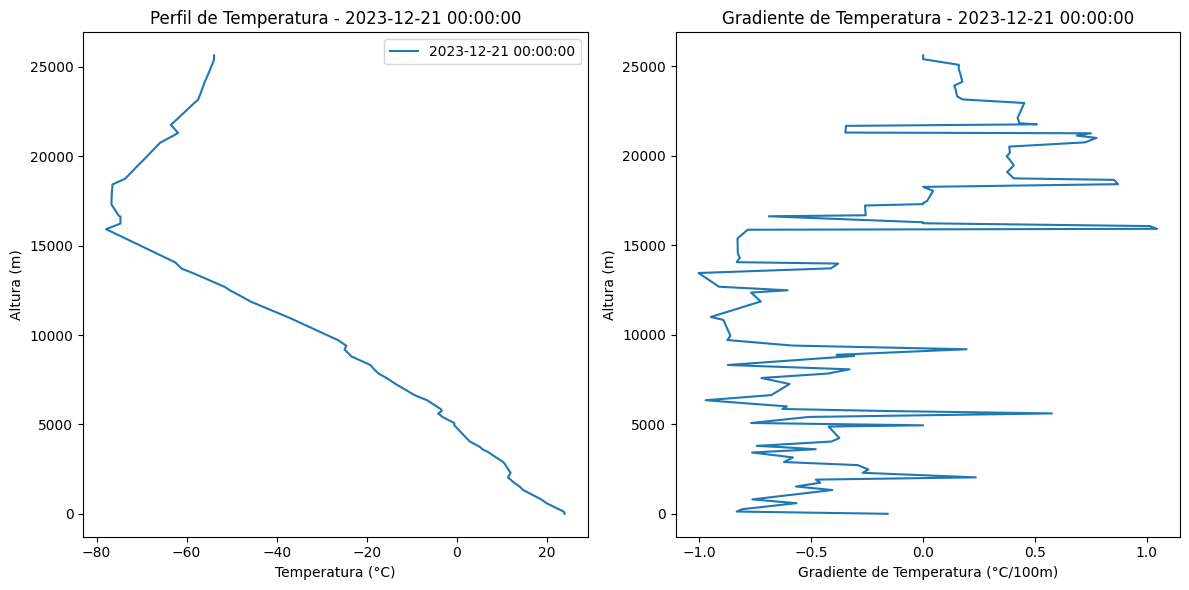

Dados para 2023-12-21 12:00:00:
     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1015.0      5.0         24.6      21.7        320      4   2.571150   
1      1000.0    133.0         23.4      21.2        305      7   5.734064   
2       955.0    533.0         19.8      19.7        355     10   0.871557   
3       925.0    807.0         18.2      18.2         30     12  -6.000000   
4       913.6    914.0         17.7      17.7         15     15  -3.882286   
..        ...      ...          ...       ...        ...    ...        ...   
99       29.0  24085.0        -59.1     -91.8        110     15 -14.095389   
100      27.0  24538.0        -57.1     -91.2         75     20 -19.318517   
101      26.0  24778.0        -56.0     -90.8         80     20 -19.696155   
102      23.3  25473.0        -52.9     -89.9         62     21 -18.541899   
103      23.0      NaN          NaN       NaN         60     21 -18.186533   

        v_wind station  station

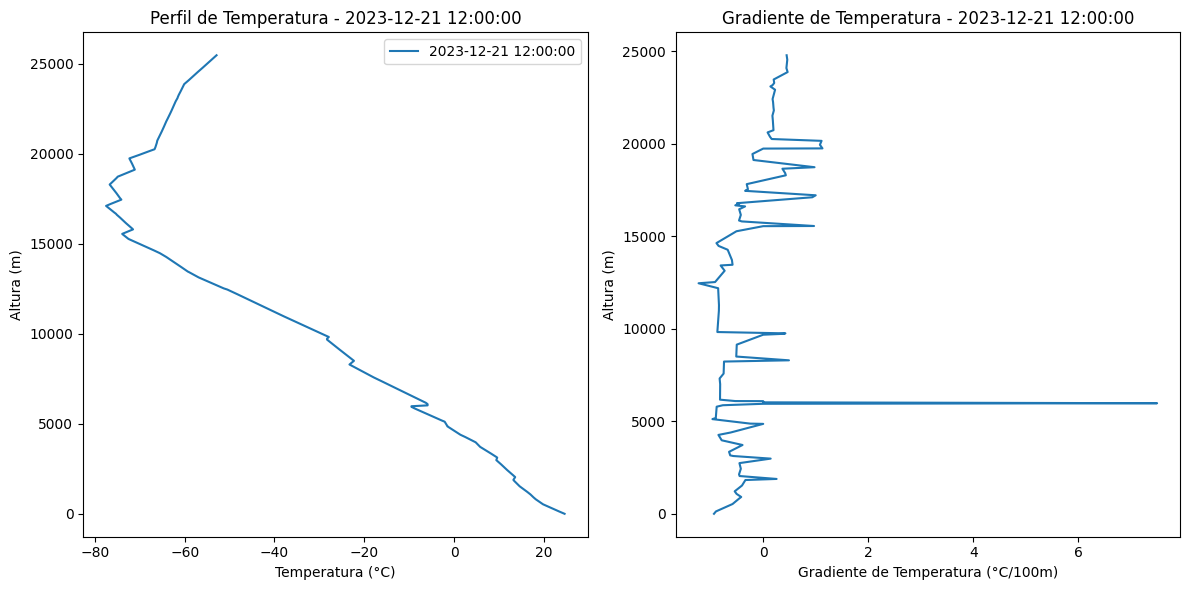

Dados para 2023-12-22 00:00:00:
     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1012.0      5.0         25.4      21.5         40      3  -1.928363   
1      1000.0    113.0         24.8      21.0         10      7  -1.215537   
2       925.0    793.0         20.2      16.3        355     12   1.045869   
3       912.1    914.0         19.5      16.4        330      9   4.500000   
4       867.0   1350.0         17.0      16.8         13      4  -0.899804   
..        ...      ...          ...       ...        ...    ...        ...   
97       22.0  25881.0        -53.8     -87.9         95     18 -17.931505   
98       21.0  26178.0        -52.4     -87.4         60     24 -20.784610   
99       20.0  26490.0        -50.9     -86.9         80     21 -20.680963   
100      19.2  26756.0        -50.5     -86.5         80     18 -17.726540   
101      19.0      NaN          NaN       NaN         80     17 -16.741732   

        v_wind station  station

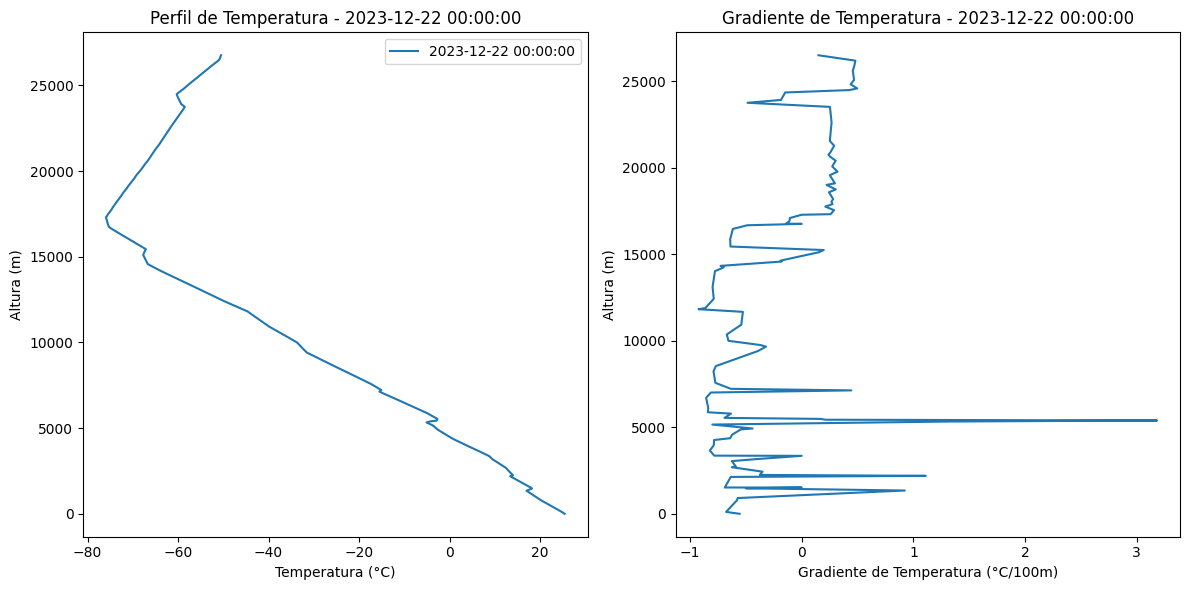

Dados para 2023-12-22 12:00:00:
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1012.0       5         27.0      21.0      350.0    8.0   1.389185   
1     1000.0     107         25.6      20.6      330.0   13.0   6.500000   
2      985.0     240         24.4      20.1      327.0   14.0   7.624946   
3      925.0     791         22.0      15.0      315.0   16.0  11.313708   
4      912.0     914         21.4      15.2      320.0   15.0   9.641814   
..       ...     ...          ...       ...        ...    ...        ...   
94      16.6   27649        -52.9     -87.9       64.0   23.0 -20.672263   
95      15.0   28313        -48.3     -85.8       60.0   21.0 -18.186533   
96      14.1   28719        -45.5     -84.5       87.0   17.0 -16.976702   
97      14.0   28766        -45.7     -84.7       90.0   16.0 -16.000000   
98      13.7   28910        -46.3     -85.3        NaN    NaN        NaN   

          v_wind station  station_number               

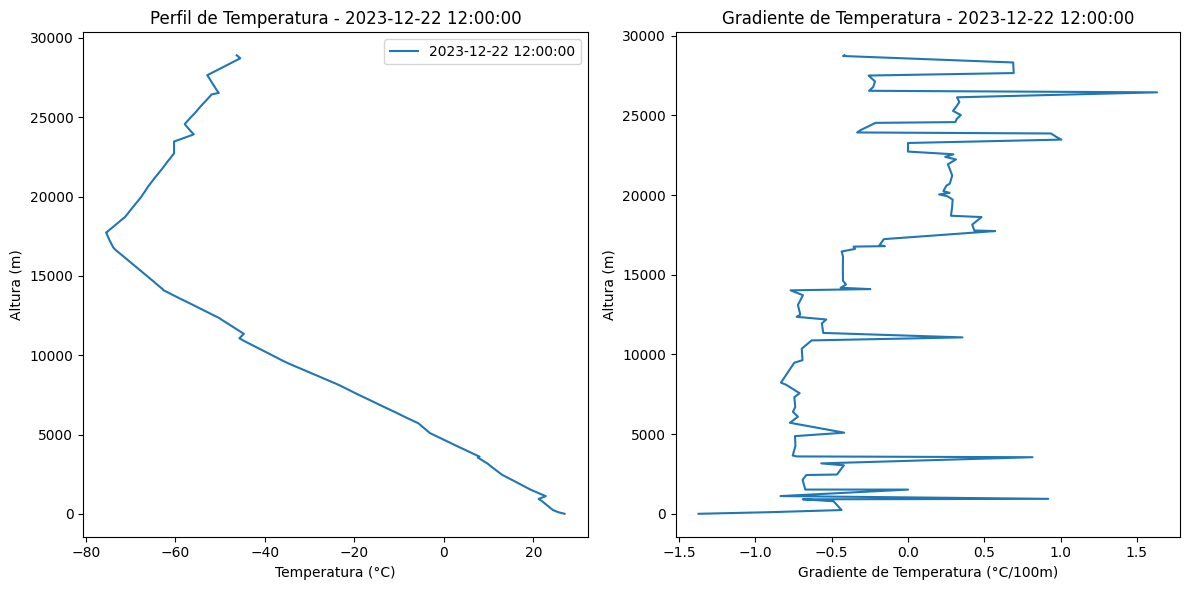

Dados para 2023-12-23 00:00:00:
    pressure  height  temperature  dewpoint  direction  speed        u_wind  \
0     1011.0       5         24.8      22.3      180.0    3.0 -3.673940e-16   
1     1005.0      58         25.4      22.4      153.0    4.0 -1.815962e+00   
2     1000.0     102         25.4      22.5      130.0    4.0 -3.064178e+00   
3      987.0     217         24.8      21.9      150.0    1.0 -5.000000e-01   
4      929.0     749         21.8      18.8      190.0   11.0  1.910130e+00   
..       ...     ...          ...       ...        ...    ...           ...   
69      77.0   18165        -76.0     -87.7      245.0   15.0  1.359462e+01   
70      74.5   18358        -76.7     -87.7      248.0   13.0  1.205339e+01   
71      73.0   18475        -75.9     -87.3      250.0   11.0  1.033662e+01   
72      71.0   18636        -74.8     -86.7      295.0    9.0  8.156770e+00   
73      70.9   18644        -74.7     -86.7        NaN    NaN           NaN   

       v_wind stati

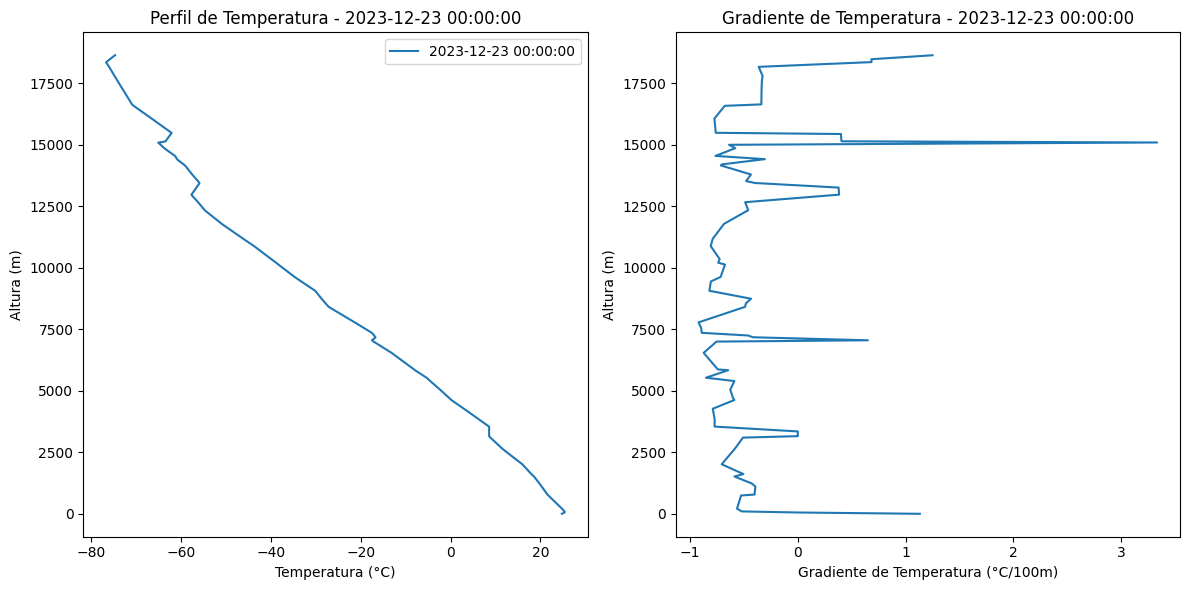

Dados para 2023-12-23 12:00:00:
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1012.0      5.0         24.8      19.8        330      8   4.000000   
1     1000.0    110.0         23.6      17.6        315     12   8.485281   
2      988.0    216.0         22.8      16.8        315     14   9.899495   
3      966.0    413.0         23.6      16.6        315     18  12.727922   
4      925.0    791.0         20.2      18.7        315     26  18.384776   
..       ...      ...          ...       ...        ...    ...        ...   
88      16.4  27768.0        -45.1     -85.1         77     21 -20.461771   
89      16.0  27932.0        -45.5     -85.3         85     19 -18.927699   
90      15.0  28361.0        -46.5     -85.9         60     33 -28.578838   
91      14.3  28678.0        -47.3     -86.3         50     28 -21.449244   
92      14.0      NaN          NaN       NaN         45     26 -18.384776   

       v_wind station  station_number      

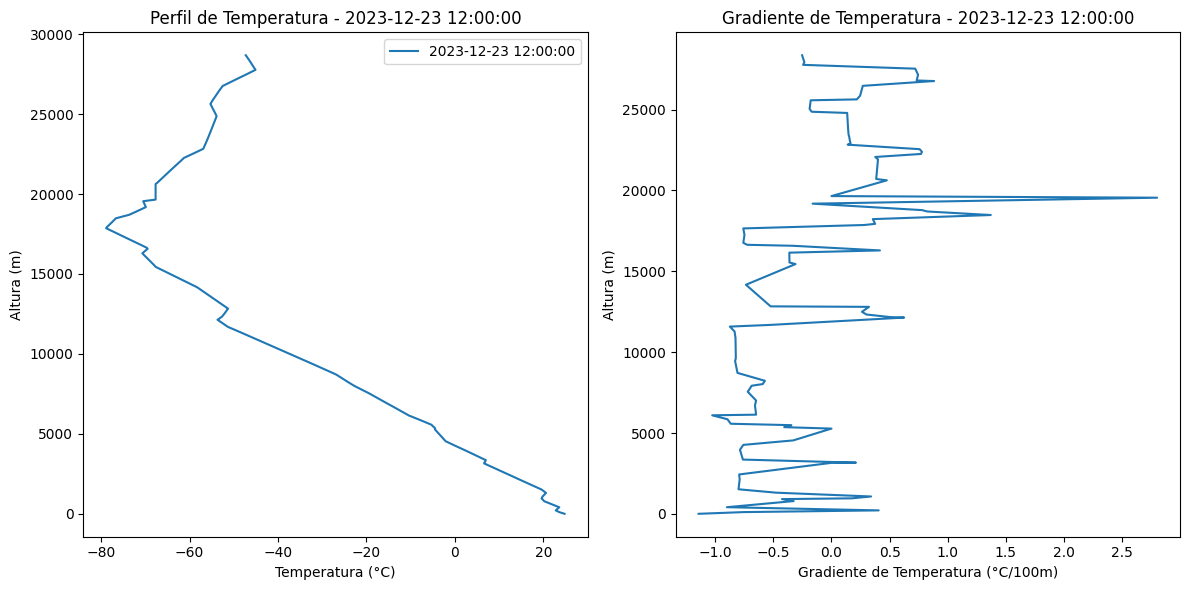

Dados para 2023-12-24 00:00:00:
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1010.0       5         25.8      17.8      200.0    5.0   1.710101   
1     1004.0      59         26.8      17.8      194.0    7.0   1.693453   
2     1000.0      95         26.6      17.6      190.0    8.0   1.389185   
3      955.0     501         24.8      12.8      181.0    9.0   0.157072   
4      925.0     781         22.6      12.6      175.0    9.0  -0.784402   
..       ...     ...          ...       ...        ...    ...        ...   
78      20.4   26382        -52.3     -87.3       97.0   27.0 -26.798746   
79      20.0   26510        -52.1     -87.1      105.0   30.0 -28.977775   
80      18.0   27200        -49.8     -86.1       90.0   34.0 -34.000000   
81      16.0   27971        -47.2     -84.9      100.0   23.0 -22.650578   
82      15.6   28137        -46.7     -84.7        NaN    NaN        NaN   

          v_wind station  station_number       time  la

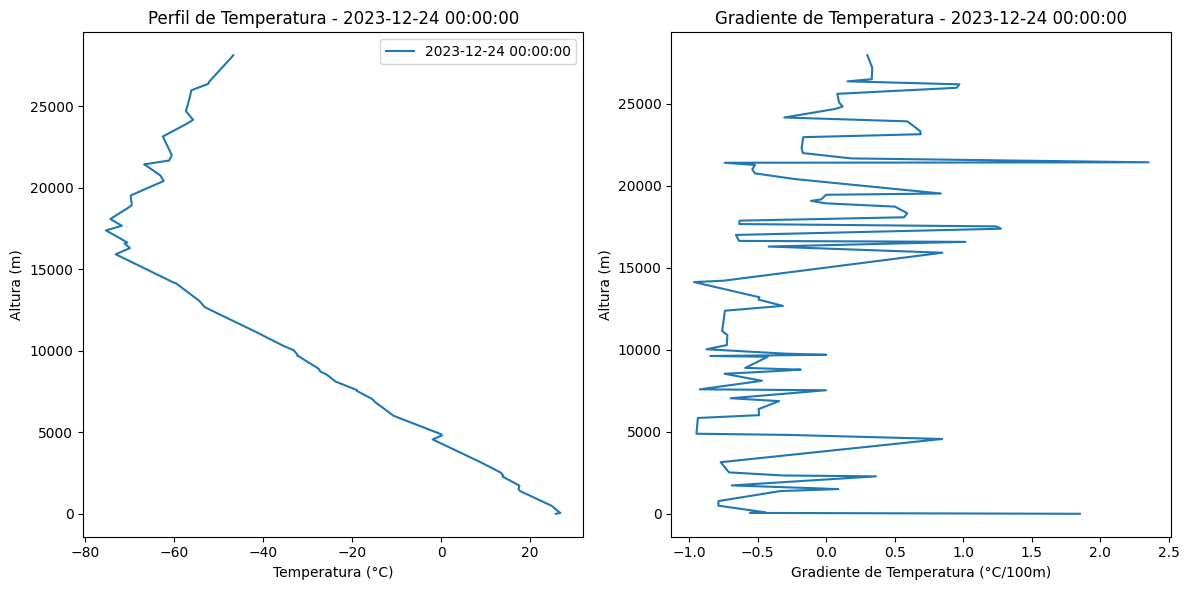

Dados para 2023-12-24 12:00:00:
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1012.0       5         26.6      21.6      100.0    4.0  -3.939231   
1     1000.0     113         24.6      20.4      130.0    4.0  -3.064178   
2      988.0     219         23.6      20.1      133.0    4.0  -2.925415   
3      925.0     791         21.2      13.2      150.0    6.0  -3.000000   
4      919.0     847         21.0      13.0      159.0    6.0  -2.150208   
..       ...     ...          ...       ...        ...    ...        ...   
82      23.2   25551        -52.5     -86.5       57.0   24.0 -20.128094   
83      22.2   25834        -53.9     -87.9       67.0   22.0 -20.251107   
84      20.0   26510        -49.5     -86.5       90.0   17.0 -17.000000   
85      19.0   26847        -47.9     -85.8       80.0   17.0 -16.741732   
86      18.9   26882        -47.7     -85.7        NaN    NaN        NaN   

          v_wind station  station_number               

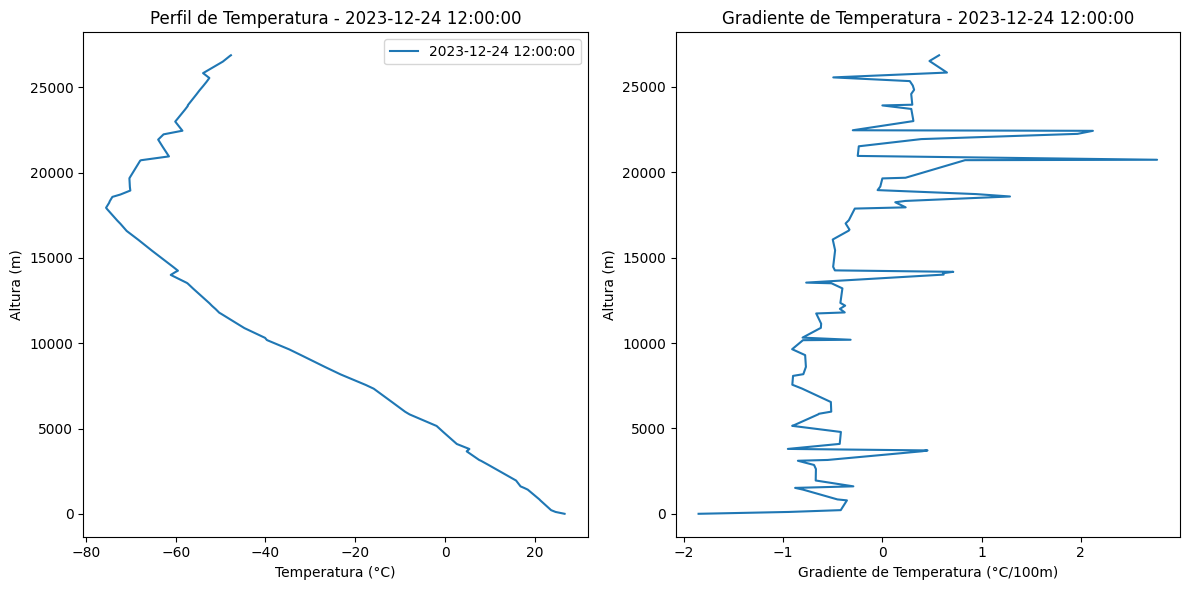

Dados para 2023-12-25 00:00:00:
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1012.0      5.0         25.4      22.1        190      1   0.173648   
1     1000.0    109.0         24.8      21.6        160      2  -0.684040   
2      938.0    667.0         20.2      19.6        148      4  -2.119677   
3      925.0    788.0         19.8      18.3        145      4  -2.294306   
4      850.0   1516.0         17.2      15.9        355      6   0.522934   
..       ...      ...          ...       ...        ...    ...        ...   
74      21.0  26216.0        -52.4     -86.8        100     39 -38.407502   
75      20.0  26530.0        -51.7     -86.7        100     38 -37.422695   
76      19.0  26863.0        -51.3     -86.3         85     32 -31.878230   
77      17.4  27439.0        -47.3     -85.3         97     31 -30.768931   
78      17.0      NaN          NaN       NaN        100     31 -30.529040   

      v_wind station  station_number       

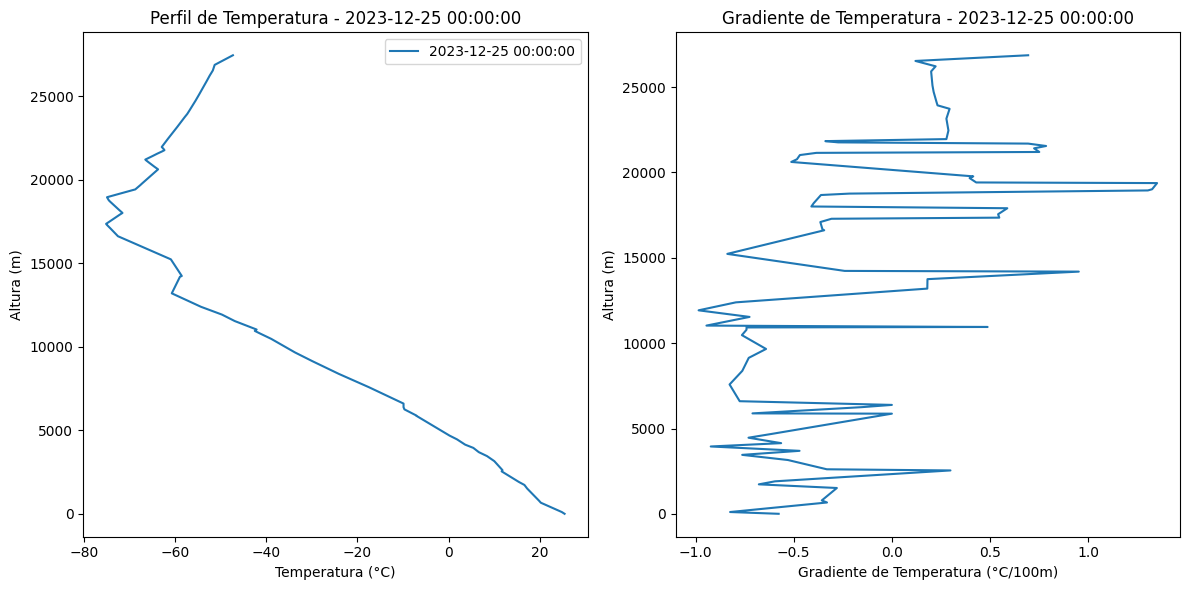

Dados para 2023-12-25 12:00:00:
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1009.0       5         27.4      22.6        0.0    2.0  -0.000000   
1     1000.0      88         26.0      21.7      350.0    7.0   1.215537   
2      971.0     347         23.6      20.6      348.0   10.0   2.079117   
3      958.0     465         24.8      16.8      347.0   11.0   2.474462   
4      925.0     772         23.0      16.0      345.0   15.0   3.882286   
..       ...     ...          ...       ...        ...    ...        ...   
89      36.0   22747        -62.4     -90.4       75.0   21.0 -20.284442   
90      35.0   22922        -61.5     -90.1      100.0   27.0 -26.589809   
91      33.0   23288        -59.6     -89.6       90.0   25.0 -25.000000   
92      30.0   23880        -56.7     -88.7       95.0   31.0 -30.882036   
93      29.7   23944        -56.5     -88.5        NaN    NaN        NaN   

          v_wind station  station_number               

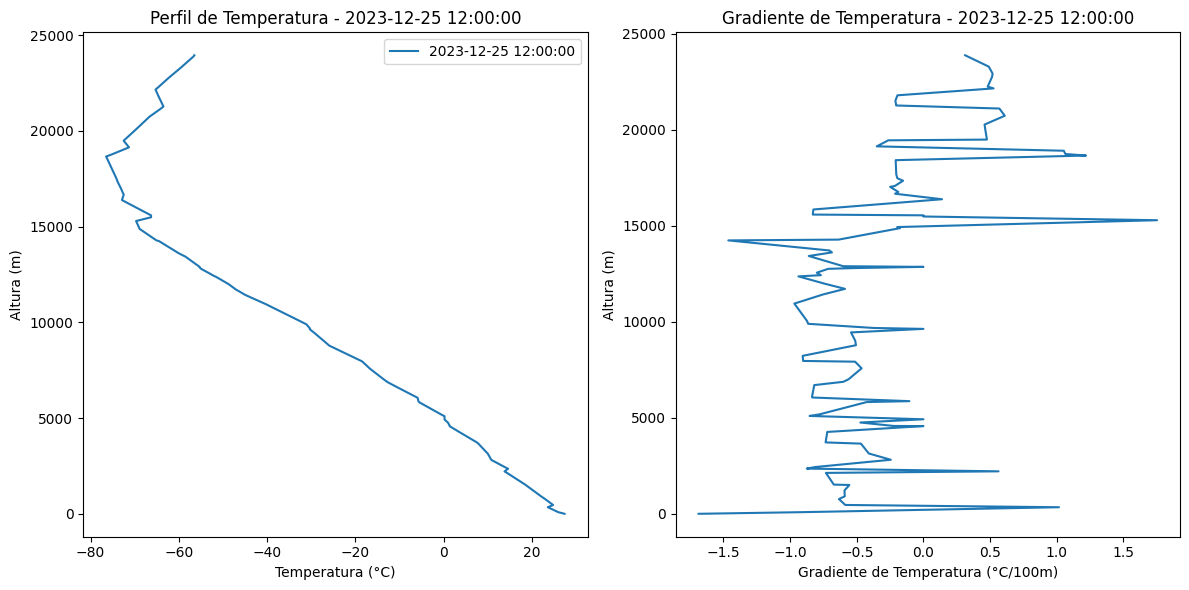

In [59]:
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Definindo as datas de verão e inverno
inicio_verao = datetime(2023, 6, 21)
inicio_inverno = datetime(2023, 12, 21)

# Criando listas de datas para verão e inverno
datas_verao = [inicio_verao + timedelta(days=i) for i in range(5)]
datas_inverno = [inicio_inverno + timedelta(days=i) for i in range(5)]

# Criando listas de horários 0 e 12 horas
horarios = [0, 12]

# Combinando datas e horários
datas_horarios_verao = [(data, hora) for data in datas_verao for hora in horarios]
datas_horarios_inverno = [(data, hora) for data in datas_inverno for hora in horarios]

# Juntando todas as datas
datas_horarios_total = datas_horarios_verao + datas_horarios_inverno

# local da análise
station = 'SBFL'

# Loop sobre todas as combinações de datas e horários
for data, hora in datas_horarios_total:
    # Data para análise
    date = datetime(data.year, data.month, data.day, hora)

    # Extraindo os dados
    df = WyomingUpperAir.request_data(date, station)

    # Realizar análise dos dados aqui conforme necessário
    print(f"Dados para {date}:")
    print(df)

# Fazendo figura do perfil de temperatura
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Gráfico do perfil de temperatura
    axs[0].plot(df['temperature'], df['height'], label=f'{date}')
    axs[0].set_xlabel('Temperatura (°C)')
    axs[0].set_ylabel('Altura (m)')
    axs[0].set_title(f'Perfil de Temperatura - {date}')
    axs[0].legend()

    # Calcular gradiente de temperatura
    deltaT = np.diff(df['temperature'])
    deltaZ = np.diff(df['height'])

    dTdZ = (deltaT / deltaZ) * 100  # a cada 100 m

    # Gráfico do gradiente de temperatura
    axs[1].plot(dTdZ, df['height'][:-1])
    axs[1].set_xlabel('Gradiente de Temperatura (°C/100m)')
    axs[1].set_ylabel('Altura (m)')
    axs[1].set_title(f'Gradiente de Temperatura - {date}')

    plt.tight_layout()
    plt.show()

# Análise de dados no espaço
Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica.

['Best GFS Quarter Degree Forecast Time Series']
['reftime', 'latitude', 'time', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


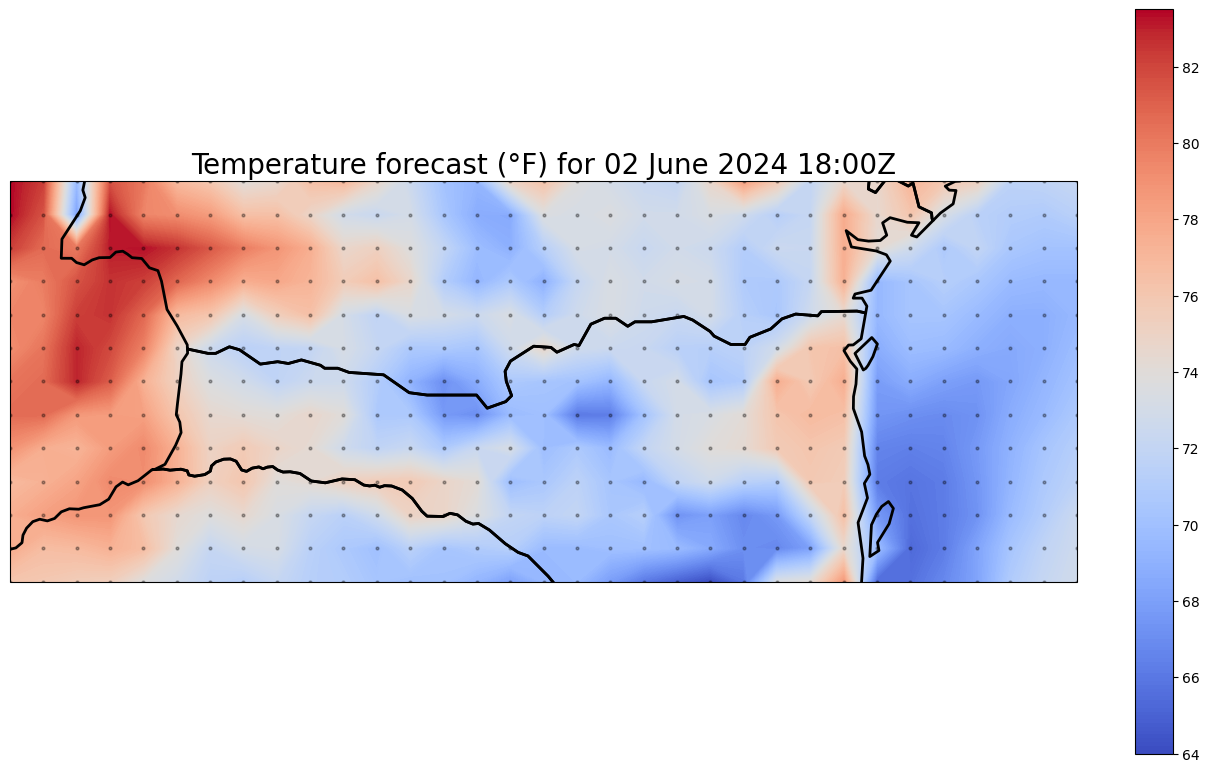

In [11]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface'] # Podem analisar outras variáveis 

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55., -47., -28, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')